In [1]:
import numpy as np
from time import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import pdspy.modeling as modeling
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.animation import FuncAnimation
import os
import pickle

%matplotlib inline

### read in data

In [2]:
param_names = ["T_star","logL_star","logM_disk","logR_disk","h_0","logR_in",\
          "gamma","beta","logM_env","logR_env","f_cav","ksi","loga_max","p","incl"]

ranges = [[3000.,5000.], [-1,3.],[-8.,-2.], [0.,3.],[0.01,0.5],[-1.,2.5],[0.0,2.0],\
        [0.5,2.0],[-8.,-2.],[2.5,4.], [0.,1.], [0.5,1.5],[0.,5.],[2.5,4.5],[0.,90.]]
steps=[]
bases=[]
for i in range(len(ranges)):
    steps.append(np.linspace(ranges[i][0],ranges[i][1],11))
    bases.append(steps[i][5])

# get all model data
with open ('../grid_metadata/corefull.txt', 'rb') as fp:
    core= pickle.load(fp)[100:500]
with open ('../grid_metadata/cubefull.txt', 'rb') as fp:
    cube = np.array(pickle.load(fp))[:,100:500]
with open ('../grid_metadata/cubefull.txt', 'rb') as fp:
    nancube = np.array(pickle.load(fp))[:,100:500]
    
# x values (wavelengths) - 500 values, in normal space
with open ('../grid_metadata/xvals.txt', 'rb') as fp:
    xvals = pickle.load(fp)[100:500]

# fix -infs: powerlaw cutoff
for i in range(len(cube)):
    if -np.inf in cube[i]:
        a = cube[i].tolist()
        a.reverse()
        ind = len(a)-a.index(-np.inf)
        x1 = xvals[ind]
        y1 = cube[i][ind]
        for j in range(ind):
            cube[i][j]=(100*(np.log10(xvals[j]/x1)))+y1
            
# nan cutoff for means            
nancube[nancube<-20]=np.nan

### implement PCA on full grid

In [3]:
# subtracting from the seds each sample mean
seds_msub = cube - np.nanmean(nancube,axis=1)[:,np.newaxis]

t0 = time()
pca = PCA(n_components=40).fit(seds_msub)
print("done in %0.3fs" % (time() - t0))

eigenseds=np.array(pca.components_)

done in 0.055s


### read in slice data

In [59]:
#import os
#gammadir='./../grid/transform/gamma/'
#logmenvdir='./../grid/transform/logmenv/'
#gammas=[]
#gammaseds=[]
#for i in range(len(os.listdir(gammadir))):
#    gammas.append(float(os.listdir(gammadir)[i].split("_")[(2*6)+1]))
#    filename=os.listdir(gammadir)[i]
#    model=modeling.YSOModel()
#    model.read_yso(gammadir+filename)
#    gammaseds.append(np.log10(model.spectra["SED"].flux)[100:500])
#
#logmenvs=[]
#logmenvseds=[]
#for i in range(len(os.listdir(logmenvdir))):
#    logmenvs.append(float(os.listdir(logmenvdir)[i].split("_")[(2*8)+1]))
#    filename=os.listdir(logmenvdir)[i]
#    model=modeling.YSOModel()
#    model.read_yso(logmenvdir+filename)
#    logmenvseds.append(np.log10(model.spectra["SED"].flux)[100:500])

/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


In [67]:
#gammasliceseds=[]
#logmenvsliceseds=[]
#gammaslicecoords=[]
#logmenvslicecoords=[]
#for i in range(11):
#    gammasliceseds.append(slicevals[6][i])
#    gammaslicecoords.append(float(slicenames[6][i].split("_")[(2*6)+1]))
#    logmenvsliceseds.append(slicevals[8][i])
#    logmenvslicecoords.append(float(slicenames[8][i].split("_")[(2*8)+1]))
#for i in range(len(gammas)):
#    gammasliceseds.append(gammaseds[i])
#    gammaslicecoords.append(gammas[i])
#    
#for i in range(len(logmenvs)):
#    logmenvsliceseds.append(logmenvseds[i])
#    logmenvslicecoords.append(logmenvs[i])

In [69]:
#with open('../grid_metadata/gammaslicecoords.txt', 'wb') as fp:
#    pickle.dump(gammaslicecoords, fp)
#with open('../grid_metadata/gammasliceseds.txt', 'wb') as fp:
#    pickle.dump(gammasliceseds, fp)
#with open('../grid_metadata/logmenvslicecoords.txt', 'wb') as fp:
#    pickle.dump(logmenvslicecoords, fp)
#with open('../grid_metadata/logmenvsliceseds.txt', 'wb') as fp:
#    pickle.dump(logmenvsliceseds, fp)

In [57]:
with open('../grid_metadata/gammaslicecoords.txt', 'rb') as fp:
    gammaslicecoords= pickle.load(fp)
with open('../grid_metadata/gammasliceseds.txt', 'rb') as fp:
    gammasliceseds= pickle.load(fp)
with open('../grid_metadata/gammasliceseds.txt', 'rb') as fp:
    nangammasliceseds= pickle.load(fp)
with open('../grid_metadata/logmenvslicecoords.txt', 'rb') as fp:
    logmenvslicecoords= pickle.load(fp)
with open('../grid_metadata/logmenvsliceseds.txt', 'rb') as fp:
    logmenvsliceseds= pickle.load(fp)
with open('../grid_metadata/logmenvsliceseds.txt', 'rb') as fp:
    nanlogmenvsliceseds= pickle.load(fp)

In [58]:
slicevals=[]
slicevals.append(gammasliceseds)
slicevals.append(logmenvsliceseds)

nanslicevals=[]
nanslicevals.append(nangammasliceseds)
nanslicevals.append(nanlogmenvsliceseds)

slicecoords=[gammaslicecoords,logmenvslicecoords]

In [59]:
# fix -infs: powerlaw cutoff
for i in range(len(slicevals)):
    for j in range(len(slicevals[i])):
        if -np.inf in slicevals[i][j]:
            a = slicevals[i][j].tolist()
            a.reverse()
            ind = len(a)-a.index(-np.inf)
            x1 = xvals[ind]
            y1 = slicevals[i][j][ind]
            for m in range(ind):
                slicevals[i][j][m]=(100*(np.log10(xvals[m]/x1)))+y1
                
#nanslicevals[nanslicevals<-20]=np.nan
for i in range(len(nanslicevals)):
    for j in range(len(nanslicevals[i])):
        for k in range(len(nanslicevals[i][j])):
            if nanslicevals[i][j][k]<-20:
                nanslicevals[i][j][k]=np.nan

In [68]:
# subtracting from the seds each sample mean
#slice_seds_msub = slicevals - np.nanmean(nanslicevals,axis=2)[:,:,np.newaxis]

slice_seds_msub=[]
slice_seds_msub.append(slicevals[0]-np.nanmean(nanslicevals[0],axis=1)[:,np.newaxis])
slice_seds_msub.append(slicevals[1]-np.nanmean(nanslicevals[1],axis=1)[:,np.newaxis])

### fit slices

In [74]:
fitdata=[[],[]]

In [76]:
for i in range(2):
    for j in range(len(slice_seds_msub[i])):
        modeldata=[]
        paramval=slicecoords[i][j]
        coeffs=pca.transform(slice_seds_msub[i][j].reshape(1,-1))
        modeldata.append(paramval)
        for k in range(10):
            modeldata.append(coeffs[0][k])
        fitdata[i].append(modeldata)

### plot coefficient values against parameter values

In [88]:
parnames=["gamma","logMenv"]

def plotpcwpar_all(param):
    #pdf = PdfPages("../visualization/pcwpar/"+param_names[param]+"_pcwpar.pdf")
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8,12))
    for coeffindex in range(10):
        pvals=[]
        cvals=[]
        for i in range(len(fitdata[param])):
            if not param in log:
                pvals.append(fitdata[param][i][0])
            else:
                if param==0:
                    pvals.append(np.log10(2.1-1*fitdata[param][i][0]))
                if param==1:
                    pvals.append(np.log10(-1.5-1*fitdata[param][i][0]))
                if param==14:
                    pvals.append(1-np.cos(fitdata[param][i][0]*np.pi/90))
            cvals.append(fitdata[param][i][coeffindex+1])         
        ax[coeffindex//2][coeffindex%2].scatter(pvals,cvals)
        ax[coeffindex//2][coeffindex%2].set_xlabel(parnames[param])
        ax[coeffindex//2][coeffindex%2].set_ylabel("w"+str(coeffindex))
    
    plt.subplots_adjust(hspace=0.6)
    plt.subplots_adjust(wspace=0.7)
    plt.show()
    
    # Now save the figure.
    #pdf.savefig(fig)
    plt.clf()

    # Close the pdf.
    #pdf.close()
    print("principal component weight/parameter plots generated for ", param_names[param])

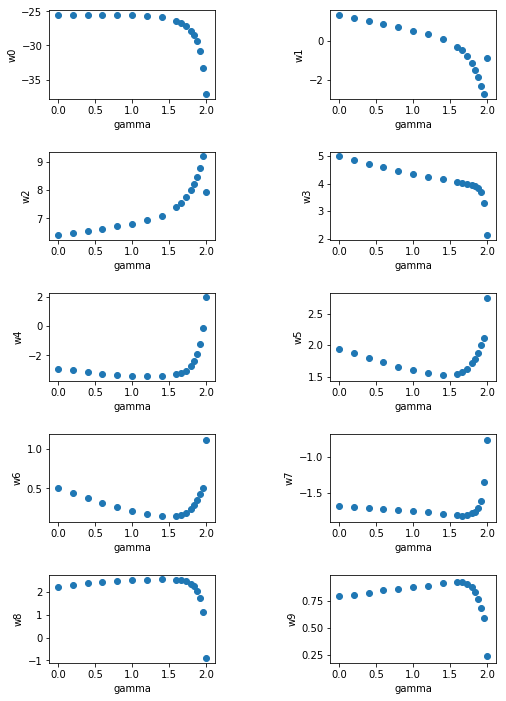

principal component weight/parameter plots generated for  T_star


<Figure size 432x288 with 0 Axes>

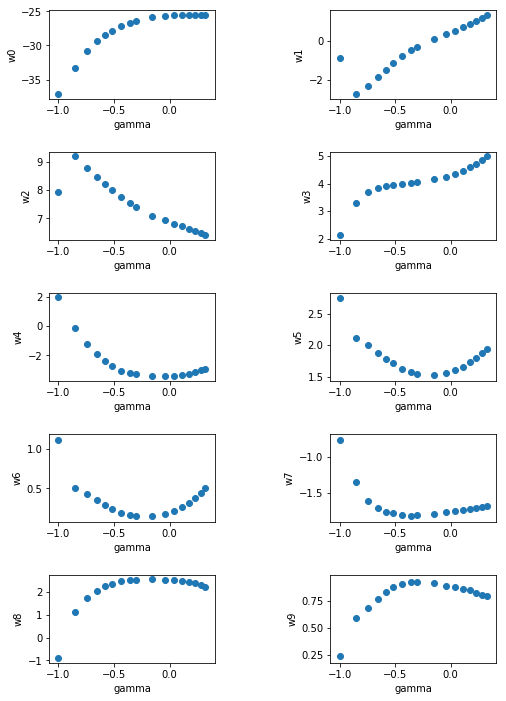

principal component weight/parameter plots generated for  T_star


<Figure size 432x288 with 0 Axes>

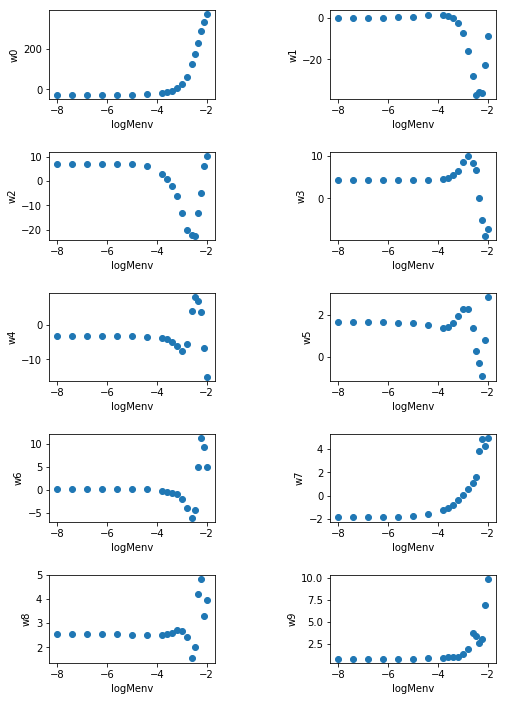

principal component weight/parameter plots generated for  logL_star


<Figure size 432x288 with 0 Axes>

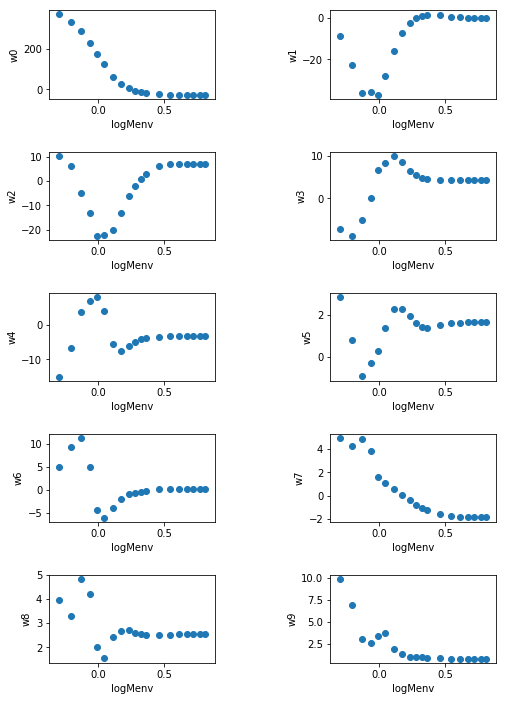

principal component weight/parameter plots generated for  logL_star


<Figure size 432x288 with 0 Axes>

In [89]:
for i in range(len(parnames)):
    log=[]
    plotpcwpar_all(i)
    log=[i]
    plotpcwpar_all(i)

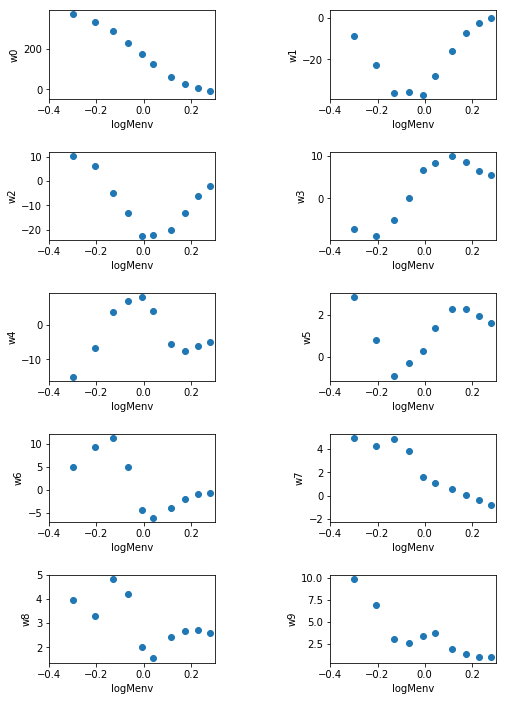

principal component weight/parameter plots generated for  logL_star


<Figure size 432x288 with 0 Axes>

In [110]:
param=1
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8,12))
for coeffindex in range(10):
    pvals=[]
    cvals=[]
    for i in range(len(fitdata[param])):
        pvals.append(np.log10(-1.5-1*fitdata[param][i][0]))
        cvals.append(fitdata[param][i][coeffindex+1])         
    ax[coeffindex//2][coeffindex%2].scatter(pvals,cvals)
    ax[coeffindex//2][coeffindex%2].set_xlabel(parnames[param])
    ax[coeffindex//2][coeffindex%2].set_ylabel("w"+str(coeffindex))
    ax[coeffindex//2][coeffindex%2].set_xlim(-0.4,0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.7)
plt.show()

# Now save the figure.
#pdf.savefig(fig)
plt.clf()

# Close the pdf.
#pdf.close()
print("principal component weight/parameter plots generated for ", param_names[param])

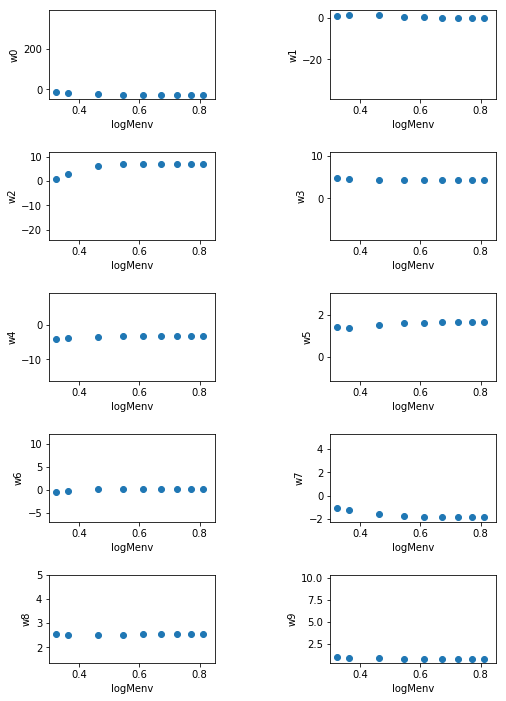

principal component weight/parameter plots generated for  logL_star


<Figure size 432x288 with 0 Axes>

In [111]:
param=1
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8,12))
for coeffindex in range(10):
    pvals=[]
    cvals=[]
    for i in range(len(fitdata[param])):
        pvals.append(np.log10(-1.5-1*fitdata[param][i][0]))
        cvals.append(fitdata[param][i][coeffindex+1])         
    ax[coeffindex//2][coeffindex%2].scatter(pvals,cvals)
    ax[coeffindex//2][coeffindex%2].set_xlabel(parnames[param])
    ax[coeffindex//2][coeffindex%2].set_ylabel("w"+str(coeffindex))
    ax[coeffindex//2][coeffindex%2].set_xlim(0.3,0.85)
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.7)
plt.show()

# Now save the figure.
#pdf.savefig(fig)
plt.clf()

# Close the pdf.
#pdf.close()
print("principal component weight/parameter plots generated for ", param_names[param])

In [112]:
import george
from george import kernels
from scipy.optimize import minimize

In [116]:
np.array(fitdata[0]).shape

(17, 11)

In [132]:
len(slicevals[0])

17

In [127]:
fitdata[0][4][0]

0.8

In [137]:
paramvals=[]
weights=[]
for param in range(2):
    pl=[]
    wl=[]
    for model in range(len(slicevals[param])):
        if param==0:
            pl.append(np.log10(2.1-1*fitdata[param][model][0]))
        if param==1:
            pl.append(np.log10(-1.5-1*fitdata[param][model][0]))        
    paramvals.append(pl)
    
    for w in range(10):
        wsl=[]
        for model in range(len(slicevals[param])):
            wsl.append(fitdata[param][model][w+1])
        wl.append(wsl)
    weights.append(wl)

In [138]:
def load_pcwpar(param,weight):
    return np.array(paramvals[param]).reshape(-1,1), np.array(weights[param][weight])

In [172]:
def gpgamma(weight):
    X, y = load_pcwpar(0,weight)
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(0.4**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(-1,.4,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

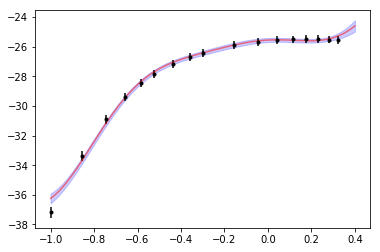

Initial ln-likelihood: -121.05
      fun: 14.009786815815096
 hess_inv: array([[1.40631763, 0.52764542],
       [0.52764542, 0.34213923]])
      jac: array([-1.86427314e-07,  7.05351681e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([7.77166949, 0.70089409])

Final ln-likelihood: -14.01


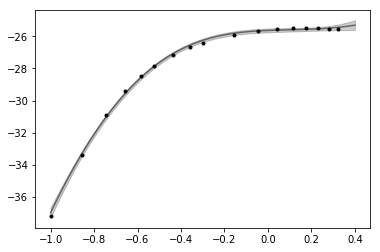

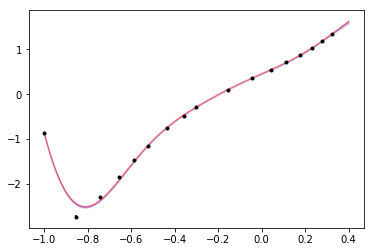

Initial ln-likelihood: -127.19
      fun: -0.1356345337893945
 hess_inv: array([[2.00202415, 0.55372377],
       [0.55372377, 0.17501848]])
      jac: array([-2.26968223e-06, -6.47665001e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([ 2.47551261, -2.68834445])

Final ln-likelihood: 0.14


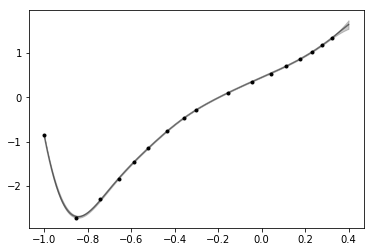

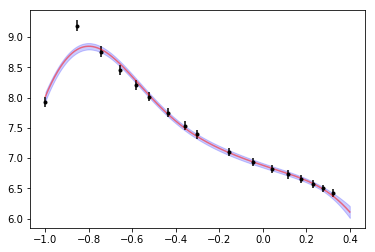

Initial ln-likelihood: -89.75
      fun: 3.5899595455147466
 hess_inv: array([[0.51404624, 0.10778012],
       [0.10778012, 0.10055687]])
      jac: array([3.93170649e-06, 1.65069503e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([ 3.55363274, -1.72161075])

Final ln-likelihood: -3.59


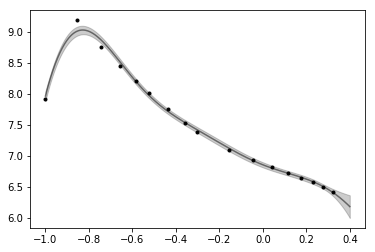

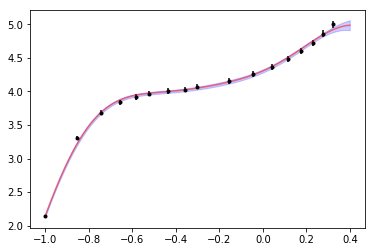

Initial ln-likelihood: -40.07
      fun: -10.096332496197386
 hess_inv: array([[0.84912448, 0.24741437],
       [0.24741437, 0.11846486]])
      jac: array([ 3.52278130e-06, -2.15952491e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([ 2.9782049 , -1.27933614])

Final ln-likelihood: 10.10


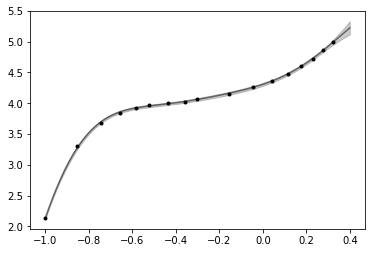

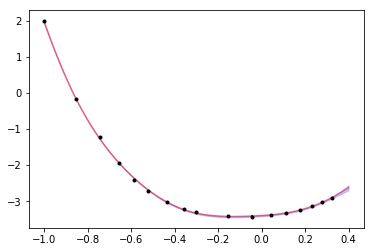

Initial ln-likelihood: -16.36
      fun: -5.799508760607138
 hess_inv: array([[0.71274269, 0.19999108],
       [0.19999108, 0.0919512 ]])
      jac: array([1.91548679e-06, 2.25947042e-06])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 2.66072198, -2.17453337])

Final ln-likelihood: 5.80


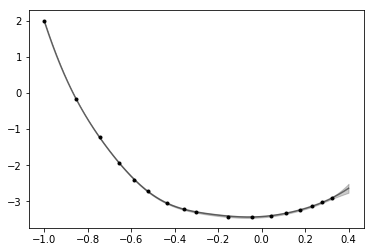

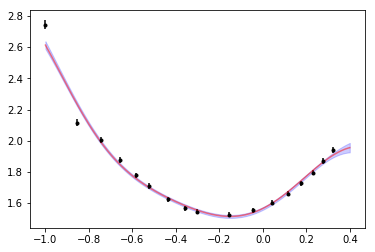

Initial ln-likelihood: -78.24
      fun: -14.912796064540665
 hess_inv: array([[0.72898724, 0.17955771],
       [0.17955771, 0.09314415]])
      jac: array([ 2.88814772e-06, -3.50877599e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([ 2.05491955, -1.75543526])

Final ln-likelihood: 14.91


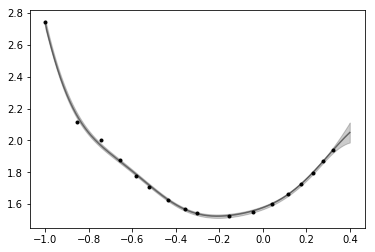

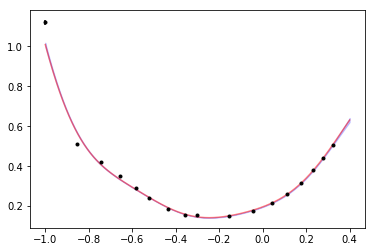

Initial ln-likelihood: -215.72
      fun: -18.168531285966488
 hess_inv: array([[0.97387849, 0.18981201],
       [0.18981201, 0.04926157]])
      jac: array([ 4.29367356e-06, -9.36561264e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 12
     njev: 14
   status: 0
  success: True
        x: array([ 1.51127234, -2.24381413])

Final ln-likelihood: 18.17


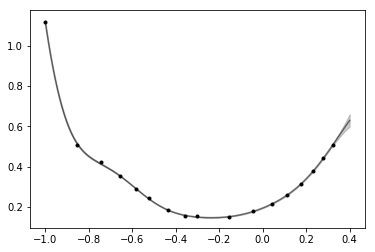

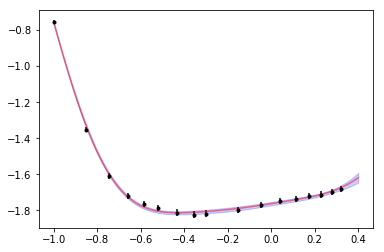

Initial ln-likelihood: -22.19
      fun: -26.083155495314962
 hess_inv: array([[0.9697693 , 0.36982553],
       [0.36982553, 0.21339114]])
      jac: array([-1.27218937e-06,  2.13897482e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 15
     njev: 18
   status: 0
  success: True
        x: array([ 0.87059458, -1.361219  ])

Final ln-likelihood: 26.08


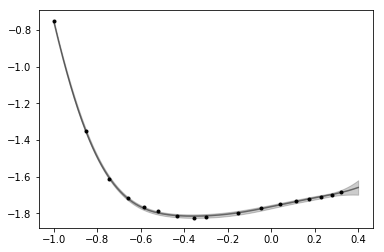

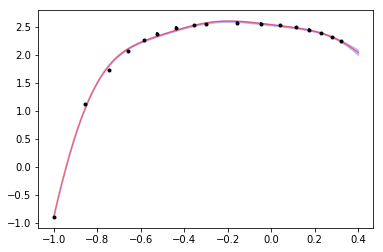

Initial ln-likelihood: -76.67
      fun: -5.779600566261879
 hess_inv: array([[0.81275826, 0.24272535],
       [0.24272535, 0.10477677]])
      jac: array([ 1.95056509e-06, -9.87756266e-07])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([ 2.24400634, -2.45459065])

Final ln-likelihood: 5.78


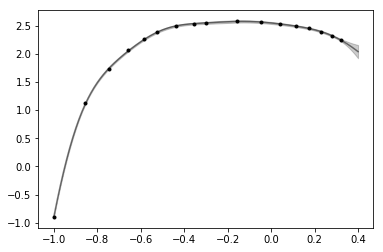

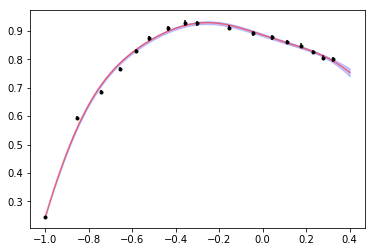

Initial ln-likelihood: -25.19
      fun: -27.08200238105657
 hess_inv: array([[0.56358728, 0.14613002],
       [0.14613002, 0.0804659 ]])
      jac: array([-3.44539330e-07,  7.83858923e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([-0.65973842, -2.37824873])

Final ln-likelihood: 27.08


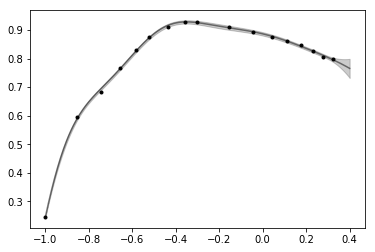

In [173]:
for i in range(10):
    gpgamma(i)

      fun: -0.1356345337893945
 hess_inv: array([[2.00202415, 0.55372377],
       [0.55372377, 0.17501848]])
      jac: array([-2.26968223e-06, -6.47665001e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([ 2.47551261, -2.68834445])

Final ln-likelihood: 0.14


<ErrorbarContainer object of 3 artists>

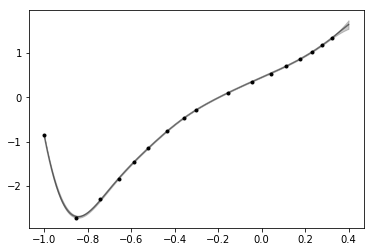

In [174]:
def gplogmenv(weight):
    X, y = load_pcwpar(1,weight)
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(0.4**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(-0.4,0.85,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

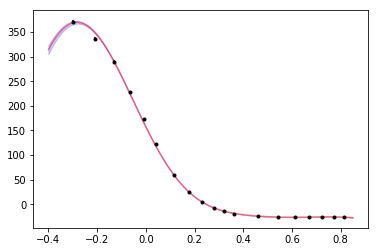

Initial ln-likelihood: -128.47
      fun: 59.29780059739075
 hess_inv: array([[0.29108784, 0.0437343 ],
       [0.0437343 , 0.02377693]])
      jac: array([-5.63825597e-06, -4.91976971e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([10.0115569 , -2.97205063])

Final ln-likelihood: -59.30


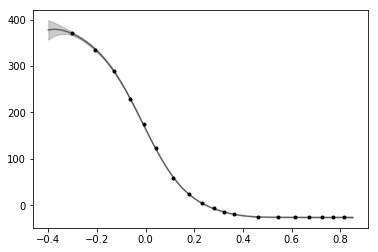

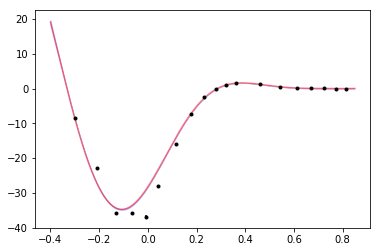

Initial ln-likelihood: -999.68
      fun: 79.74507299941257
 hess_inv: array([[0.22938057, 0.02149032],
       [0.02149032, 0.01082332]])
      jac: array([-7.89389014e-06, -8.47430201e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 15
     njev: 52
   status: 2
  success: False
        x: array([ 5.09988747, -3.79032299])

Final ln-likelihood: -79.75


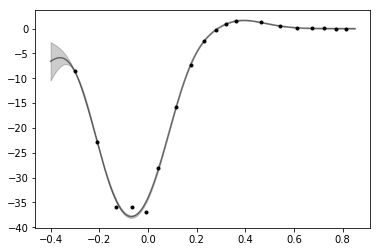

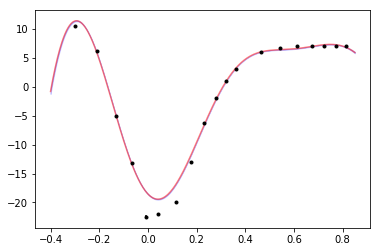

Initial ln-likelihood: -1377.80
      fun: 54.97093488432773
 hess_inv: array([[0.14705143, 0.02486193],
       [0.02486193, 0.015852  ]])
      jac: array([-5.17522508e-07,  5.76378881e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 15
     njev: 24
   status: 0
  success: True
        x: array([ 4.33299749, -5.14039813])

Final ln-likelihood: -54.97


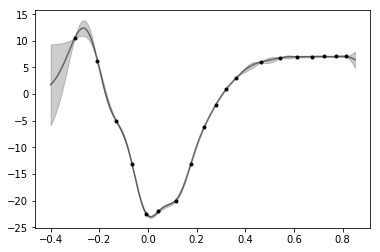

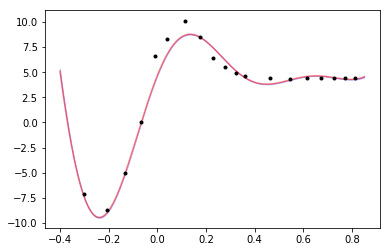

Initial ln-likelihood: -2122.08
      fun: 43.30501087482535
 hess_inv: array([[0.14869349, 0.02413071],
       [0.02413071, 0.01441875]])
      jac: array([-3.72595508e-06, -8.63203421e-06])
  message: 'Optimization terminated successfully.'
     nfev: 23
      nit: 17
     njev: 23
   status: 0
  success: True
        x: array([ 3.15644391, -5.11867773])

Final ln-likelihood: -43.31


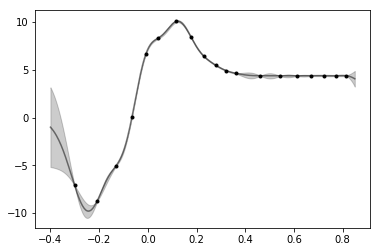

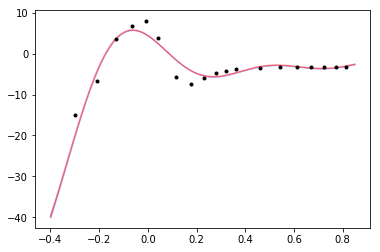

Initial ln-likelihood: -8893.52
      fun: 39.40996021612281
 hess_inv: array([[0.19796999, 0.03746286],
       [0.03746286, 0.0157939 ]])
      jac: array([-8.95217227e-07,  1.49699412e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 19
     njev: 22
   status: 0
  success: True
        x: array([ 3.66347462, -4.7010531 ])

Final ln-likelihood: -39.41


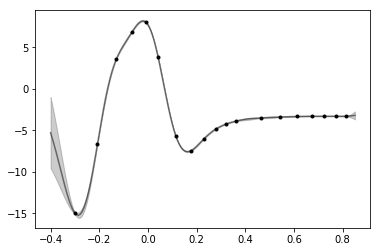

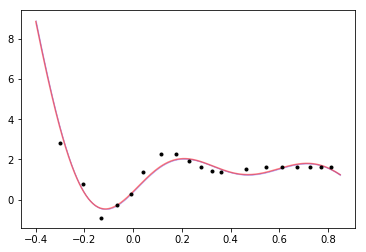

Initial ln-likelihood: -5516.89
      fun: 16.981398168937893
 hess_inv: array([[0.16163881, 0.02728557],
       [0.02728557, 0.01413339]])
      jac: array([7.64987362e-09, 1.57376689e-09])
  message: 'Optimization terminated successfully.'
     nfev: 29
      nit: 15
     njev: 29
   status: 0
  success: True
        x: array([ 0.67299577, -4.97142863])

Final ln-likelihood: -16.98


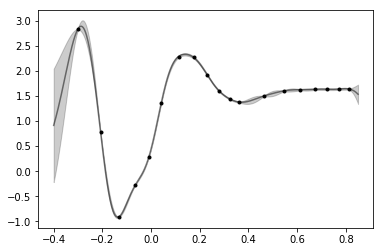

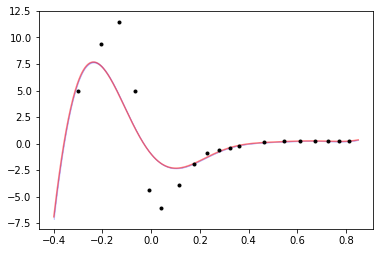

Initial ln-likelihood: -14886.01
      fun: 39.242167569177994
 hess_inv: array([[0.15599743, 0.03047631],
       [0.03047631, 0.01683412]])
      jac: array([8.86119807e-06, 7.67518424e-06])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 19
     njev: 26
   status: 0
  success: True
        x: array([ 2.82075849, -5.07470704])

Final ln-likelihood: -39.24


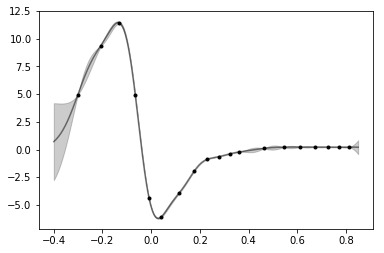

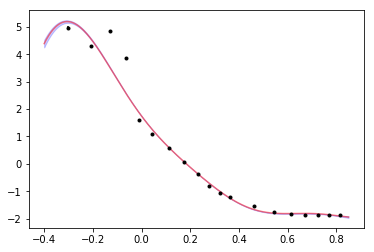

Initial ln-likelihood: -1472.47
      fun: 23.815308270165097
 hess_inv: array([[0.15283132, 0.02315486],
       [0.02315486, 0.01123642]])
      jac: array([ 5.33643458e-07, -9.48672209e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 16
     njev: 30
   status: 0
  success: True
        x: array([ 1.48209556, -4.93327551])

Final ln-likelihood: -23.82


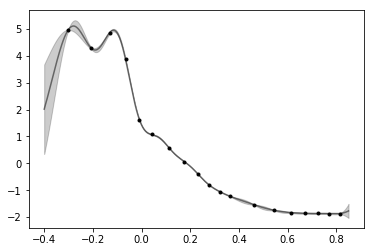

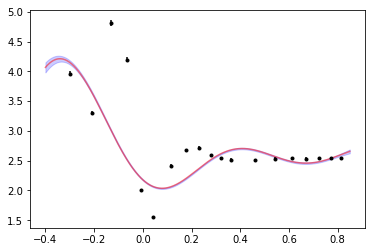

Initial ln-likelihood: -2688.75


LinAlgError: 16-th leading minor of the array is not positive definite

In [176]:
for i in range(10):
    gplogmenv(i)

In [195]:
def gpenva(weight):
    a,b = load_pcwpar(1,weight)    
    X=[]
    y=[]
    for i in range(len(a)):
        if a[i][0]<0.3:
            X.append(a[i])
            y.append(b[i])
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(0.2**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(-0.4,0.3,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    print("weight "+str(weight))
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

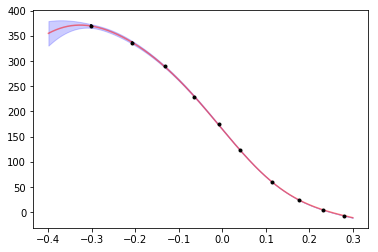

Initial ln-likelihood: -42.05
weight 0
      fun: 39.779022529216626
 hess_inv: array([[0.57426794, 0.12092909],
       [0.12092909, 0.06152689]])
      jac: array([ 1.26689429e-07, -2.81506686e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([10.65491517, -2.64027888])

Final ln-likelihood: -39.78


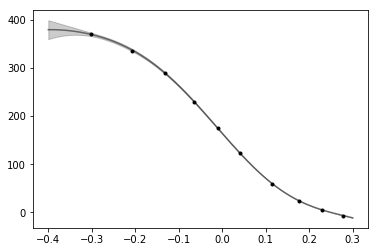

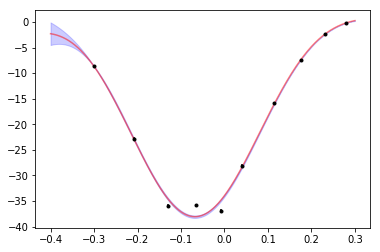

Initial ln-likelihood: -64.21
weight 1
      fun: 36.72665091671813
 hess_inv: array([[0.26971343, 0.04323307],
       [0.04323307, 0.03129025]])
      jac: array([ 9.57760462e-08, -3.79611223e-07])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 10
     njev: 25
   status: 0
  success: True
        x: array([ 5.71594825, -5.04818944])

Final ln-likelihood: -36.73


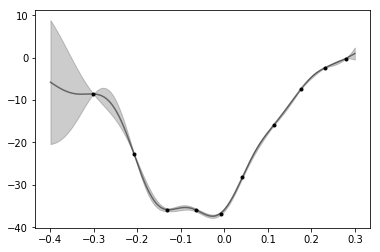

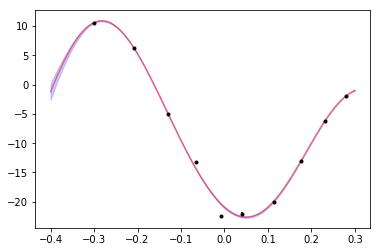

Initial ln-likelihood: -131.53
weight 2
      fun: 33.171852951973385
 hess_inv: array([[0.2593411 , 0.04636792],
       [0.04636792, 0.03692406]])
      jac: array([ 3.16004653e-08, -6.20596546e-09])
  message: 'Optimization terminated successfully.'
     nfev: 37
      nit: 15
     njev: 37
   status: 0
  success: True
        x: array([ 4.76608716, -5.22282171])

Final ln-likelihood: -33.17


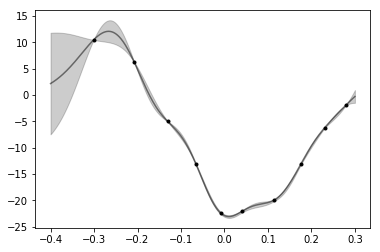

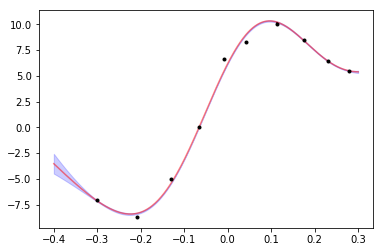

Initial ln-likelihood: -259.55
weight 3
      fun: 26.730366558379693
 hess_inv: array([[0.26335091, 0.04569794],
       [0.04569794, 0.03164079]])
      jac: array([ 3.61945974e-07, -2.16217921e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 14
     njev: 36
   status: 0
  success: True
        x: array([ 3.52136678, -5.19417448])

Final ln-likelihood: -26.73


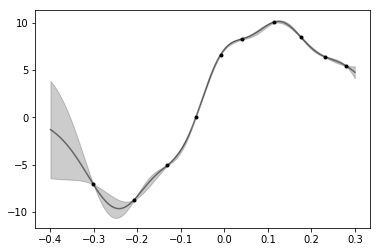

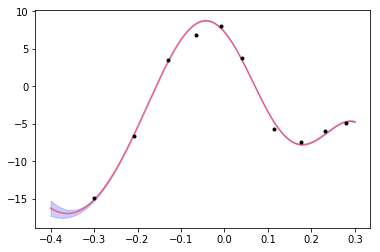

Initial ln-likelihood: -666.09
weight 4
      fun: 26.10337710318086
 hess_inv: array([[0.3199048 , 0.06363779],
       [0.06363779, 0.03376921]])
      jac: array([-5.33621695e-07,  1.51651972e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 4.05902577, -4.78902609])

Final ln-likelihood: -26.10


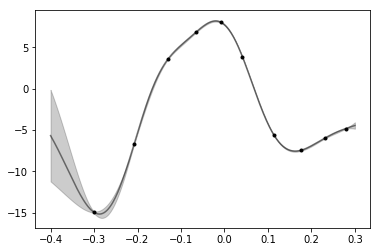

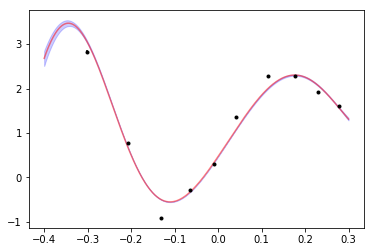

Initial ln-likelihood: -1948.08
weight 5
      fun: 12.733393506877722
 hess_inv: array([[0.27636503, 0.05660823],
       [0.05660823, 0.03714622]])
      jac: array([ 1.74701227e-06, -3.66187148e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 0.87550666, -5.0885212 ])

Final ln-likelihood: -12.73


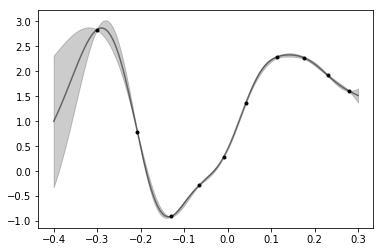

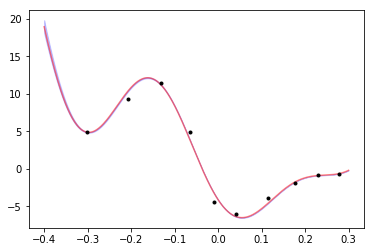

Initial ln-likelihood: -1200.35
weight 6
      fun: 25.5254687002439
 hess_inv: array([[0.27872281, 0.05612399],
       [0.05612399, 0.0390063 ]])
      jac: array([-1.47174778e-06,  3.55110068e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 17
     njev: 19
   status: 0
  success: True
        x: array([ 3.36031965, -5.13855966])

Final ln-likelihood: -25.53


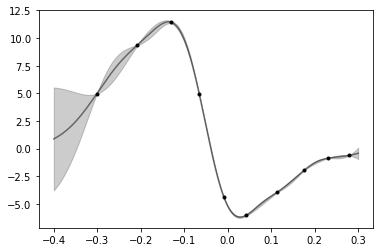

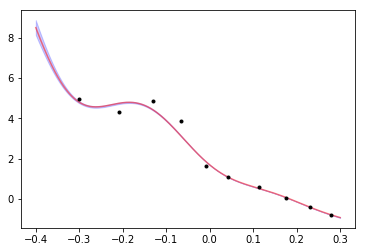

Initial ln-likelihood: -566.54
weight 7
      fun: 16.98046512553458
 hess_inv: array([[0.26643791, 0.04428463],
       [0.04428463, 0.0274777 ]])
      jac: array([-2.17840772e-06,  3.91737952e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 1.87522694, -4.99201464])

Final ln-likelihood: -16.98


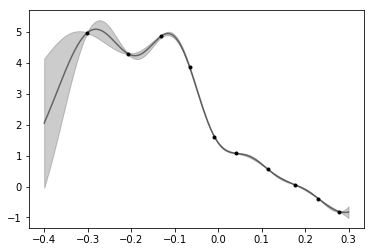

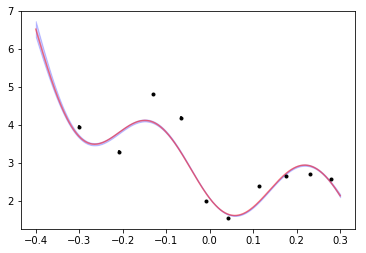

Initial ln-likelihood: -1019.72
weight 8
      fun: 15.49833498650162
 hess_inv: array([[0.29846441, 0.05043524],
       [0.05043524, 0.02711191]])
      jac: array([-1.07972154e-07,  5.91959853e-07])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 16
     njev: 19
   status: 0
  success: True
        x: array([ 1.98398587, -4.76068744])

Final ln-likelihood: -15.50


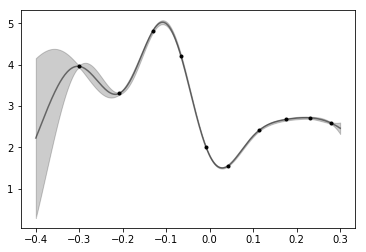

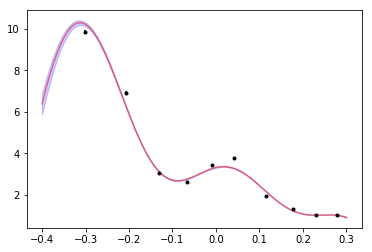

Initial ln-likelihood: -414.96
weight 9
      fun: 20.69478569189262
 hess_inv: array([[0.28271926, 0.04537591],
       [0.04537591, 0.02621335]])
      jac: array([-5.67788422e-09, -1.88344190e-08])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([ 2.80721585, -4.879917  ])

Final ln-likelihood: -20.69


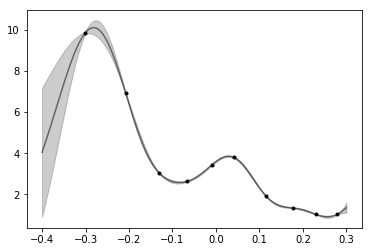

In [196]:
for i in range(10):
    gpenva(i)

In [212]:
def gpenva_full(weight):
    X,y = load_pcwpar(1,weight)    
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(0.2**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(-0.4,0.3,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    print("weight "+str(weight))
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

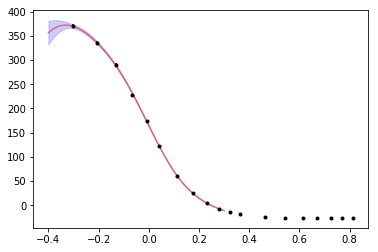

Initial ln-likelihood: -60.61
weight 0
      fun: 59.297800597584605
 hess_inv: array([[0.29267809, 0.04417573],
       [0.04417573, 0.02349287]])
      jac: array([5.83007932e-07, 1.19041797e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 6
     njev: 51
   status: 2
  success: False
        x: array([10.01155946, -2.97204996])

Final ln-likelihood: -59.30


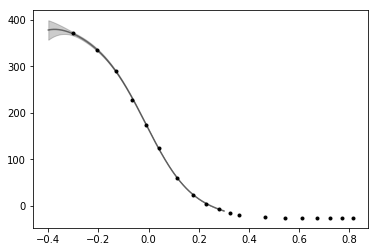

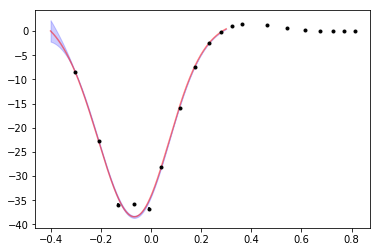

Initial ln-likelihood: -96.79
weight 1
      fun: 60.11588392737707
 hess_inv: array([[0.15474782, 0.0229602 ],
       [0.0229602 , 0.01592582]])
      jac: array([-2.73054025e-06, -5.71700252e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([ 5.13810776, -4.97670202])

Final ln-likelihood: -60.12


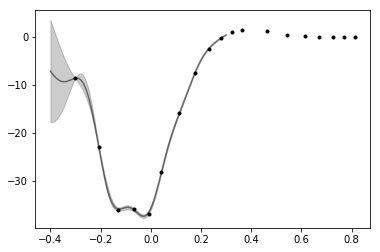

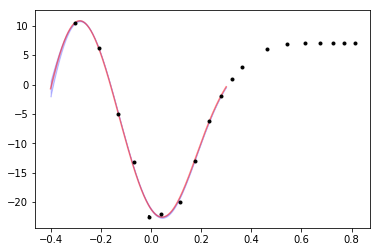

Initial ln-likelihood: -162.65
weight 2
      fun: 54.97093488432772
 hess_inv: array([[0.14930313, 0.02524342],
       [0.02524342, 0.01585758]])
      jac: array([-1.58534334e-07,  3.24675000e-07])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 14
     njev: 19
   status: 0
  success: True
        x: array([ 4.33299754, -5.14039812])

Final ln-likelihood: -54.97


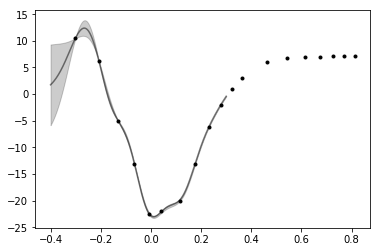

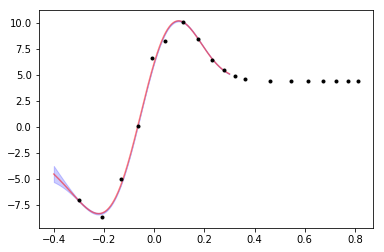

Initial ln-likelihood: -274.70
weight 3
      fun: 43.30501087482286
 hess_inv: array([[0.15098353, 0.024832  ],
       [0.024832  , 0.01480019]])
      jac: array([-1.22786474e-08,  5.76852557e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 10
     njev: 27
   status: 0
  success: True
        x: array([ 3.15644469, -5.11867751])

Final ln-likelihood: -43.31


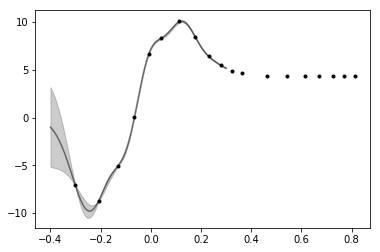

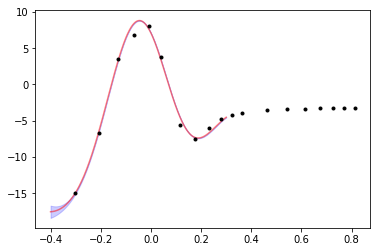

Initial ln-likelihood: -999.57
weight 4
      fun: 39.40996021612571
 hess_inv: array([[0.1885836 , 0.03595282],
       [0.03595282, 0.01555867]])
      jac: array([-7.15953115e-06,  9.43543250e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 13
     njev: 19
   status: 0
  success: True
        x: array([ 3.66347364, -4.70105321])

Final ln-likelihood: -39.41


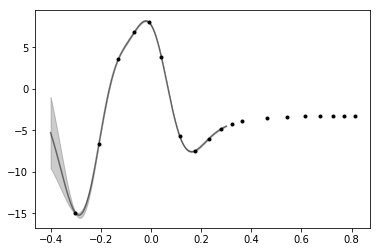

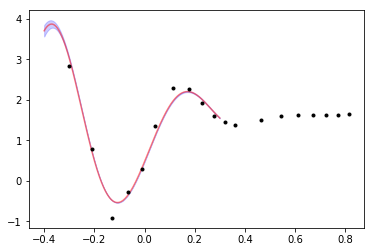

Initial ln-likelihood: -2081.96
weight 5
      fun: 16.981398168939947
 hess_inv: array([[0.15423655, 0.02667962],
       [0.02667962, 0.01408724]])
      jac: array([-5.85296874e-06,  6.44693790e-06])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 16
     njev: 35
   status: 0
  success: True
        x: array([ 0.672995 , -4.9714287])

Final ln-likelihood: -16.98


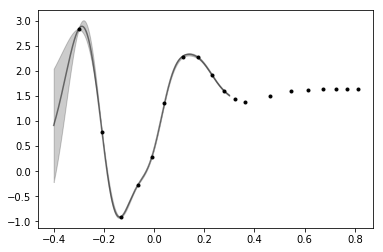

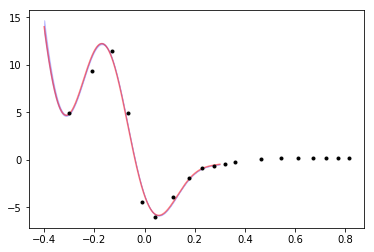

Initial ln-likelihood: -2078.16
weight 6
      fun: 39.24216756916899
 hess_inv: array([[0.16582502, 0.03165156],
       [0.03165156, 0.01700649]])
      jac: array([-8.46688465e-07,  2.41634396e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 16
     njev: 19
   status: 0
  success: True
        x: array([ 2.82075672, -5.07470744])

Final ln-likelihood: -39.24


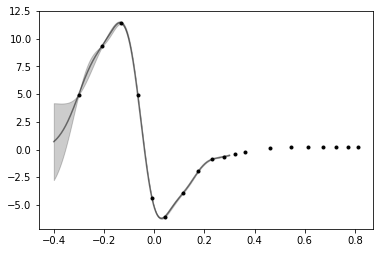

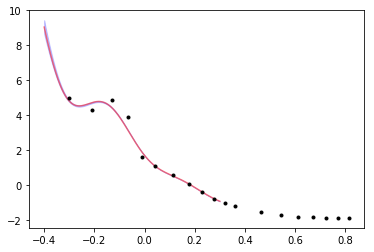

Initial ln-likelihood: -539.04
weight 7
      fun: 23.81530827016532
 hess_inv: array([[0.15708029, 0.0232992 ],
       [0.0232992 , 0.01091543]])
      jac: array([-1.34691209e-06,  8.86256856e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 13
     njev: 17
   status: 0
  success: True
        x: array([ 1.48209549, -4.93327544])

Final ln-likelihood: -23.82


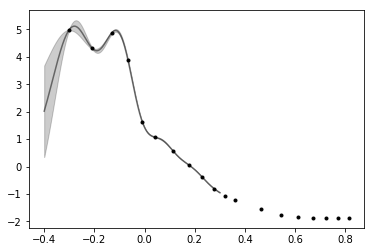

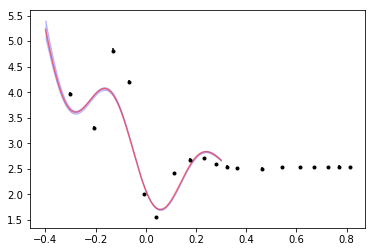

Initial ln-likelihood: -1276.38
weight 8


LinAlgError: 6-th leading minor of the array is not positive definite

In [213]:
for i in range(10):
    gpenva_full(i)

In [205]:
def gpenvb(weight):
    #a,b = load_pcwpar(1,weight)    
    #X=[]
    #y=[]
    #for i in range(len(a)):
    #    if a[i][0]>0.3:
    #        X.append(a[i])
    #        y.append(b[i])
    X,y= load_pcwpar(1,weight) 
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(1**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(0.3,0.85,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.xlim(0.3,0.85)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    print("weight "+str(weight))
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.xlim(0.3,0.85)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

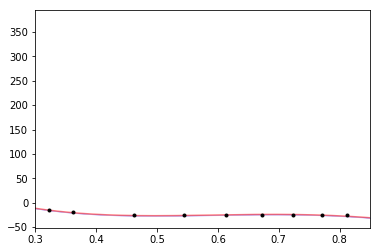

Initial ln-likelihood: -1560.82
weight 0
      fun: 59.297800597657975
 hess_inv: array([[0.29178434, 0.04466598],
       [0.04466598, 0.02363311]])
      jac: array([ 6.34114258e-07, -2.81524262e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 13
     njev: 20
   status: 0
  success: True
        x: array([10.01155883, -2.97205031])

Final ln-likelihood: -59.30


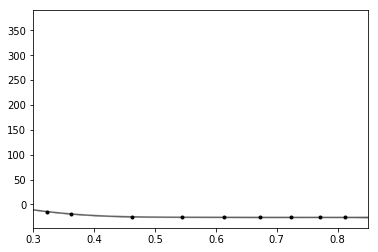

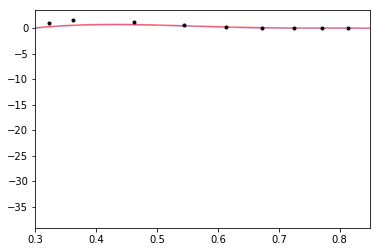

Initial ln-likelihood: -31892.54
weight 1
      fun: 79.74507299827052
 hess_inv: array([[0.23117829, 0.02139395],
       [0.02139395, 0.01082281]])
      jac: array([-8.24686140e-07,  2.41503585e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 92
      nit: 20
     njev: 81
   status: 2
  success: False
        x: array([ 5.09989142, -3.79032166])

Final ln-likelihood: -79.75


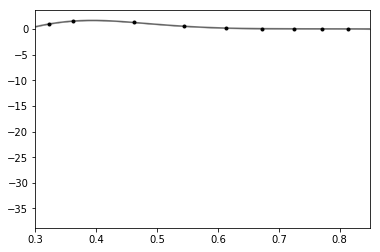

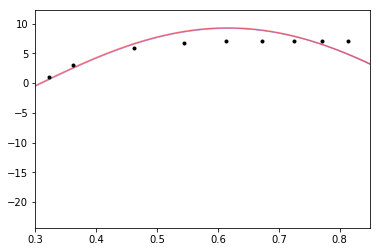

Initial ln-likelihood: -15537.87
weight 2
      fun: 54.97093488432827
 hess_inv: array([[0.14305605, 0.02397048],
       [0.02397048, 0.0157361 ]])
      jac: array([-1.76002575e-06, -3.84282509e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 10
     njev: 15
   status: 0
  success: True
        x: array([ 4.33299719, -5.14039823])

Final ln-likelihood: -54.97


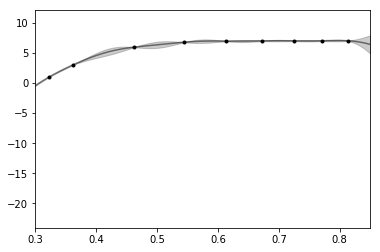

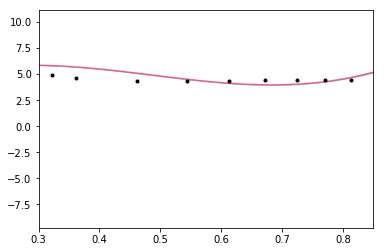

Initial ln-likelihood: -11015.17
weight 3
      fun: 43.30501087482335
 hess_inv: array([[0.14454168, 0.02515047],
       [0.02515047, 0.01463283]])
      jac: array([-2.89251767e-06,  5.84920718e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([ 3.1564444, -5.1186775])

Final ln-likelihood: -43.31


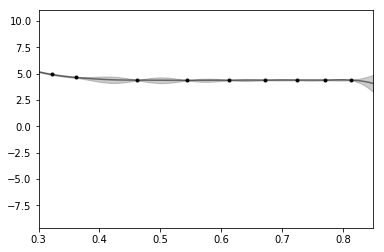

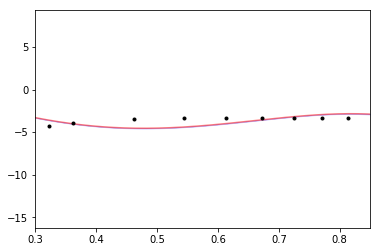

Initial ln-likelihood: -33636.15
weight 4
      fun: 39.40996021612197
 hess_inv: array([[0.20510453, 0.03810078],
       [0.03810078, 0.01585473]])
      jac: array([-2.83307600e-09,  2.23860752e-09])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 21
     njev: 25
   status: 0
  success: True
        x: array([ 3.66347474, -4.70105309])

Final ln-likelihood: -39.41


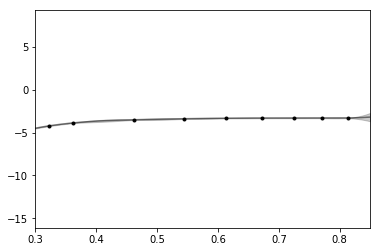

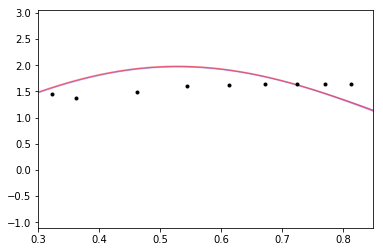

Initial ln-likelihood: -29532.23
weight 5
      fun: 16.981398168937858
 hess_inv: array([[0.16142939, 0.02656454],
       [0.02656454, 0.01340662]])
      jac: array([-1.45780604e-07,  1.69574554e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([ 0.6729958 , -4.97142861])

Final ln-likelihood: -16.98


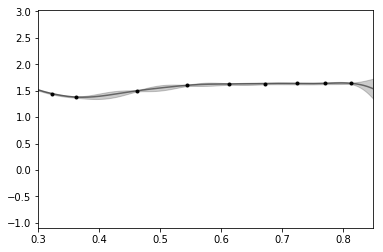

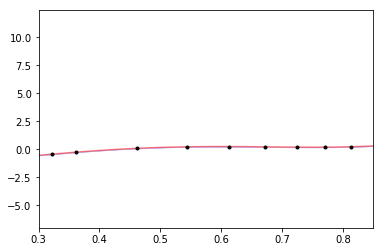

Initial ln-likelihood: -24397.09
weight 6
      fun: 39.24216756917313
 hess_inv: array([[0.16514926, 0.03163501],
       [0.03163501, 0.01705864]])
      jac: array([ 7.81771942e-06, -2.63209034e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([ 2.82075799, -5.07470725])

Final ln-likelihood: -39.24


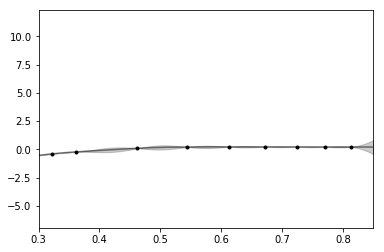

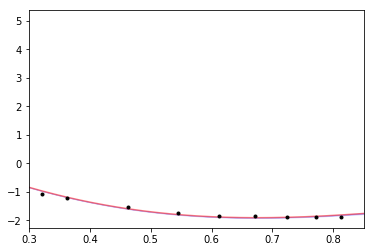

Initial ln-likelihood: -1762.93
weight 7
      fun: 23.815308270164927
 hess_inv: array([[0.15400983, 0.02293101],
       [0.02293101, 0.01119974]])
      jac: array([-1.46360264e-07,  9.94198786e-08])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([ 1.48209548, -4.93327551])

Final ln-likelihood: -23.82


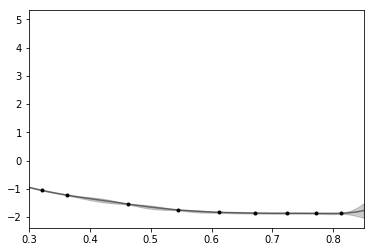

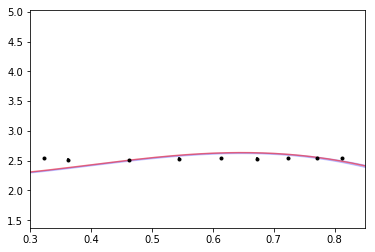

Initial ln-likelihood: -3745.30
weight 8
      fun: 21.08170136966356
 hess_inv: array([[0.1793684 , 0.02778439],
       [0.02778439, 0.01318421]])
      jac: array([ 1.74941874e-08, -2.18063008e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 19
     njev: 27
   status: 0
  success: True
        x: array([ 1.75101145, -4.67125285])

Final ln-likelihood: -21.08


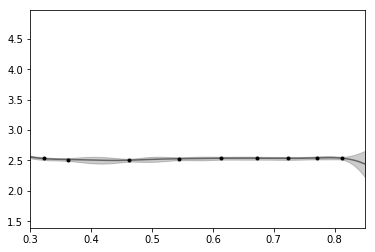

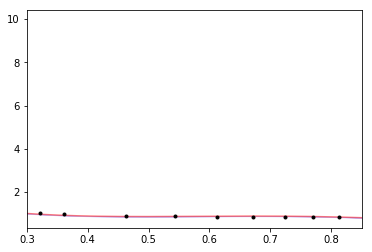

Initial ln-likelihood: -3060.09
weight 9
      fun: 31.695493066389364
 hess_inv: array([[0.14301811, 0.01870949],
       [0.01870949, 0.00943963]])
      jac: array([ 8.97049858e-07, -3.92630909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 22
     njev: 30
   status: 0
  success: True
        x: array([ 2.1765584, -4.9959614])

Final ln-likelihood: -31.70


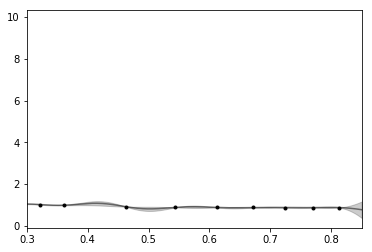

In [206]:
for i in range(10):
    gpenvb(i)

In [210]:
def gpenvb_part(weight):
    a,b = load_pcwpar(1,weight)    
    X=[]
    y=[]
    for i in range(len(a)):
        if a[i][0]>0.3:
            X.append(a[i])
            y.append(b[i])
    yerr=[j*0.01 for j in y]

    kernel = kernels.ExpSquaredKernel(1**2)* np.var(y)
    gp = george.GP(kernel)
    gp.compute(X,yerr)

    x_pred = np.linspace(0.3,0.85,400)
    pred, pred_var = gp.predict(y, x_pred, return_var=True)
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="b", alpha=0.2)
    plt.plot(x_pred, pred, "r", lw=1.5, alpha=0.5)
    plt.errorbar(X, y,yerr,fmt=".k", capsize=0)
    plt.show()

    print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
    print("weight "+str(weight))
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
    plt.errorbar(X, y, fmt=".k", capsize=0)
    plt.show()

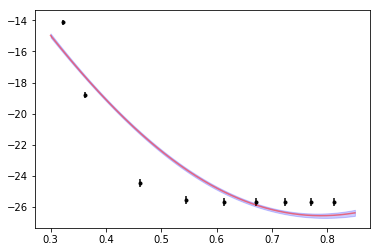

Initial ln-likelihood: -362.80
weight 0
      fun: 17.747639319027197
 hess_inv: array([[1.02071545, 0.34007913],
       [0.34007913, 0.20566402]])
      jac: array([ 2.10804728e-06, -1.08031236e-06])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 13
     njev: 17
   status: 0
  success: True
        x: array([ 6.43313592, -2.62027993])

Final ln-likelihood: -17.75


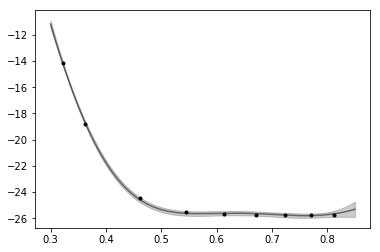

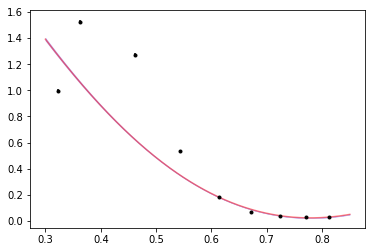

Initial ln-likelihood: -3481.41
weight 1
      fun: -2.435721368596484
 hess_inv: array([[1.16632052, 0.3272569 ],
       [0.3272569 , 0.11685861]])
      jac: array([-4.86930725e-06, -3.81922291e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([ 0.5702564 , -3.84161637])

Final ln-likelihood: 2.44


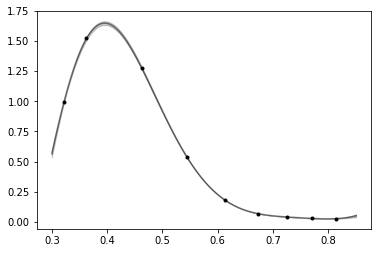

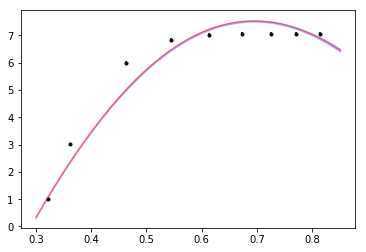

Initial ln-likelihood: -958.92
weight 2
      fun: 7.768344107050024
 hess_inv: array([[2.15889927, 0.83583559],
       [0.83583559, 0.40495664]])
      jac: array([-4.27105078e-07,  8.84942892e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 21
     njev: 27
   status: 0
  success: True
        x: array([ 5.03556133, -2.43103089])

Final ln-likelihood: -7.77


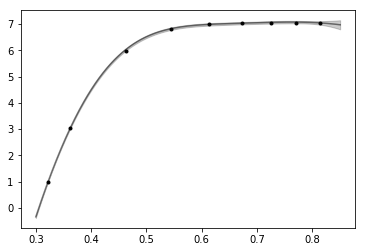

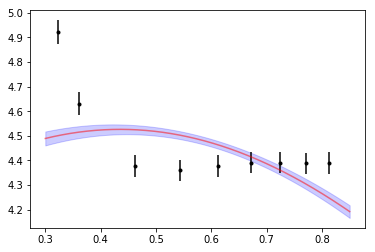

Initial ln-likelihood: -371.48
weight 3
      fun: -1.4176283886754462
 hess_inv: array([[1.12682644, 0.36127351],
       [0.36127351, 0.26874335]])
      jac: array([3.34999640e-07, 1.29459454e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 31
     njev: 48
   status: 0
  success: True
        x: array([ 3.29561591, -1.30469406])

Final ln-likelihood: 1.42


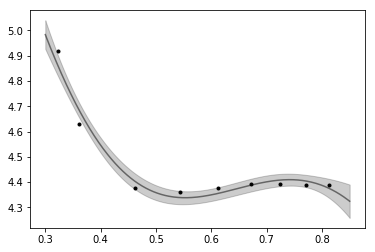

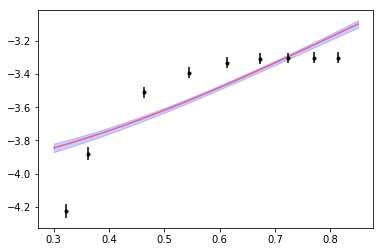

Initial ln-likelihood: -164.47
weight 4
      fun: -2.320257451591262
 hess_inv: array([[1.32260759, 0.48525502],
       [0.48525502, 0.33233336]])
      jac: array([ 4.18566196e-06, -5.04081936e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([ 3.23221234, -1.22801818])

Final ln-likelihood: 2.32


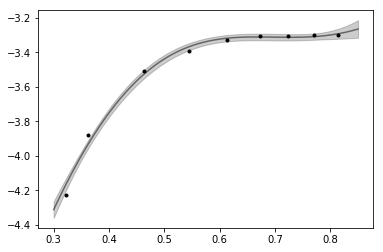

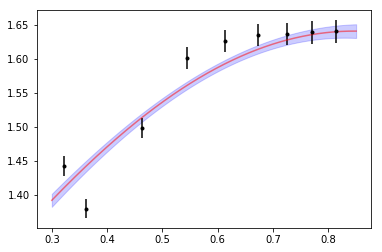

Initial ln-likelihood: -146.99
weight 5
      fun: -2.1731080911404135
 hess_inv: array([[0.94606573, 0.09698235],
       [0.09698235, 0.44800719]])
      jac: array([-8.43752423e-06, -5.06703987e-06])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 19
     njev: 26
   status: 0
  success: True
        x: array([ 0.43191102, -1.1363922 ])

Final ln-likelihood: 2.17


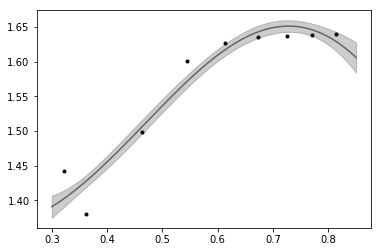

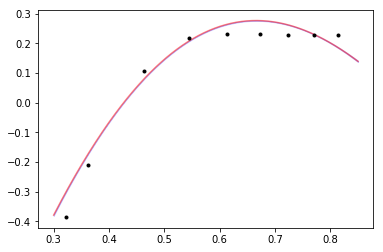

Initial ln-likelihood: -1899.16
weight 6
      fun: -18.262508818171288
 hess_inv: array([[0.68512319, 0.15663202],
       [0.15663202, 0.06870857]])
      jac: array([-4.37846211e-07,  1.28928059e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 18
     njev: 20
   status: 0
  success: True
        x: array([-0.77454449, -2.57462631])

Final ln-likelihood: 18.26


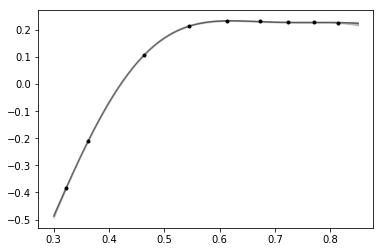

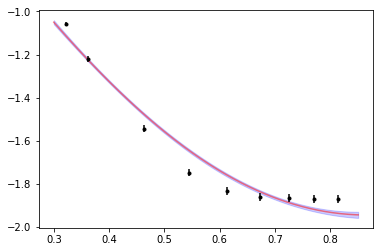

Initial ln-likelihood: -114.14
weight 7
      fun: -12.177254904393502
 hess_inv: array([[0.98389322, 0.38953789],
       [0.38953789, 0.35834508]])
      jac: array([ 6.75959200e-07, -3.46685169e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([ 0.68280897, -1.35737413])

Final ln-likelihood: 12.18


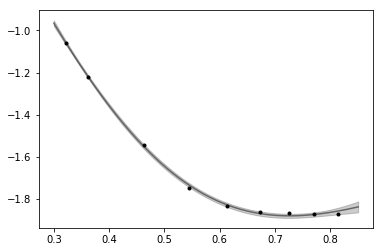

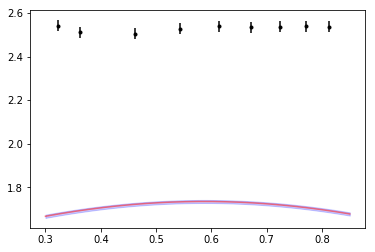

Initial ln-likelihood: -14546.31
weight 8
      fun: 21.126590975238344
 hess_inv: array([[ 0.22202251, -4.52750262],
       [-4.52750262, 92.51808318]])
      jac: array([-1.5523141e-07, -0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([   1.85682088, -166.32119237])

Final ln-likelihood: -21.13


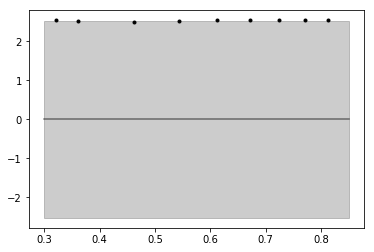

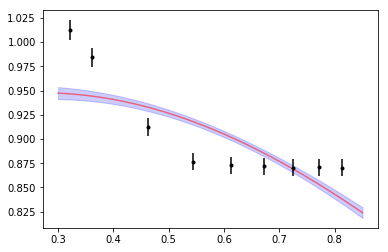

Initial ln-likelihood: -196.60
weight 9
      fun: -18.397993405072743
 hess_inv: array([[1.22376582, 0.63251377],
       [0.63251377, 0.68059326]])
      jac: array([ 4.85059263e-06, -3.08760587e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 18
     njev: 22
   status: 0
  success: True
        x: array([-0.0364866 , -0.89803614])

Final ln-likelihood: 18.40


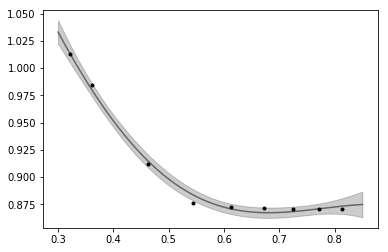

In [211]:
for i in range(10):
    gpenvb_part(i)